<h1>Оценки коэффициентов линейной регрессии </h1>
Необходимо найти оценки коэффициентов линейной регрессии $y_i = a + bx_i + e_i$ используя 20 точек на отрезке [-1.8; 2] с равномерным шагом равным 0.2. Ошибку $e_i$ считать нормально распределенной с параметрами (0, 1). В качестве эталонной зависимости взять $y_i = 2 + 2x_i + e_i$. При построении оценок коэффициентов использовать два критерия: критерий наименьших квадратов и критерий наименьших модулей. Проделать то же самое для выборки в значения $y_1$ и $y_{20}$ вносятся возмущения 10 и -10


In [2]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import scipy.optimize as opt

Эталонная функция

In [3]:
def reference_function(x):
    return 2 + 2 * x

Добавление шума в эталонную функцию:

In [5]:
def reference_noisy_function(x):
    y = []
    for i in x:
        y.append(reference_function(i) + stats.norm.rvs(0, 1))
    return y

Функция, вычисляющая параметры $\beta_0$ и $\beta_1$ МНК

In [7]:
def get_mnk_parameters(x, y):
    beta_1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_0, beta_1

Функция, возвращающая модуль минимизируемой функции

In [9]:
def least_modulus_method(parameters, x, y):
    alpha_0, alpha_1 = parameters
    sum = 0
    for i in range(len(x)):
        sum += abs(y[i] - alpha_0 - alpha_1*x[i])
    return sum

Функция, вычисляющая параметры $\alpha_0$ и $\alpha_1$ МНМ

In [10]:
def get_mnm_parameters(x, y):
    beta_0, beta_1 = get_mnk_parameters(x, y)
    result = opt.minimize(least_modulus_method, [beta_0, beta_1], args=(x, y), method='SLSQP')
    coefs = result.x
    alpha_0, alpha_1 = coefs[0], coefs[1]
    return alpha_0, alpha_1

Метод наименьших квадратов МНК

In [11]:
def MNK(x, y):
    beta_0, beta_1 = get_mnk_parameters(x, y)
    print('beta_0 = ' + str(beta_0), 'beta_1 = ' + str(beta_1))
    y_new = [beta_0 + beta_1 * x_ for x_ in x]
    return y_new

Найдем наименьших модулей МНМ

In [13]:
def MNM(x, y):
    alpha_0, alpha_1 = get_mnm_parameters(x, y)
    print('alpha_0 = ' + str(alpha_0), 'alpha_1 = ' + str(alpha_1))
    y_new = [alpha_0 + alpha_1 * x_ for x_ in x]
    return y_new

Найдем метрику удаленности:

In [15]:
def get_distance(y_model, y_regr):
    dist_y = sum([(y_model[i] - y_regr[i])**2 for i in range(len(y_model))])
    return dist_y

Функция построения линейной регрессии:

In [16]:
def plot_linear_regression(text, x, y):
    y_mnk = MNK(x, y)
    y_mnm = MNM(x, y)
    y_dist_mnk = get_distance(y, y_mnk)
    y_dist_mnm = get_distance(y, y_mnm)
    print('mnk distance', y_dist_mnk)
    print('mnm distance', y_dist_mnm)
    plt.plot(x, reference_function(x), color='lime', label='Модель')
    plt.plot(x, y_mnk, label="МНК", color='dodgerblue')
    plt.plot(x, y_mnm, label="МНМ", color='darkorange')
    plt.scatter(x, y, c='crimson', label='Выборка')
    plt.xlim([-1.8, 2])
    plt.grid()
    plt.legend()
    plt.savefig(text + '.jpg', format='jpg')
    plt.show()

beta_0 = 1.8085569134073514 beta_1 = 1.8705616208002118
alpha_0 = 1.7277637916266708 alpha_1 = 1.8511849467123824
mnk distance 12.092482116202527
mnm distance 12.225065543587316


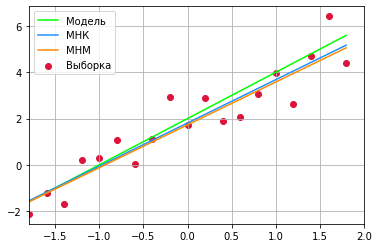

In [20]:
x = np.arange(-1.8, 2, 0.2)
y = reference_noisy_function(x)
plot_linear_regression('NoPeturbations', x, y)

beta_0 = 1.833172070184686 beta_1 = 0.33908931905312767
alpha_0 = 1.7288633749684257 alpha_1 = 1.1809567507610335
mnk distance 145.79493670362478
mnm distance 162.16095209228808


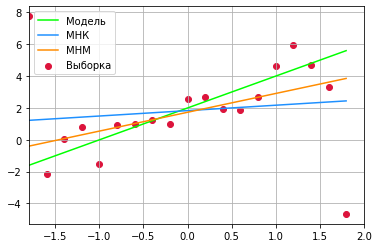

In [18]:
x = np.arange(-1.8, 2, 0.2)
y = reference_noisy_function(x)
y[0] += 10
y[-1] -= 10
plot_linear_regression('Perturbations', x, y)